# load data

In [19]:
import pandas as pd

# Try reading the file with a different encoding
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Initial Checks

In [24]:
# Check for missing values
print(df.isnull().sum())

# Check column types
print(df.dtypes)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


# more checking

In [26]:
# Check for nulls and datatypes
print(df.info())

# Quick stats
print(df.describe())

# See unique values in key columns
print(df['Region'].unique())
print(df['Category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Clean the Data(not needed in this case)

In [29]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for missing values
print(df.isnull().sum())

# Drop unwanted columns if needed (e.g., 'Postal Code')
df.drop(['Postal Code'], axis=1, inplace=True)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# Monthly Sales Trend

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\4261455051.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


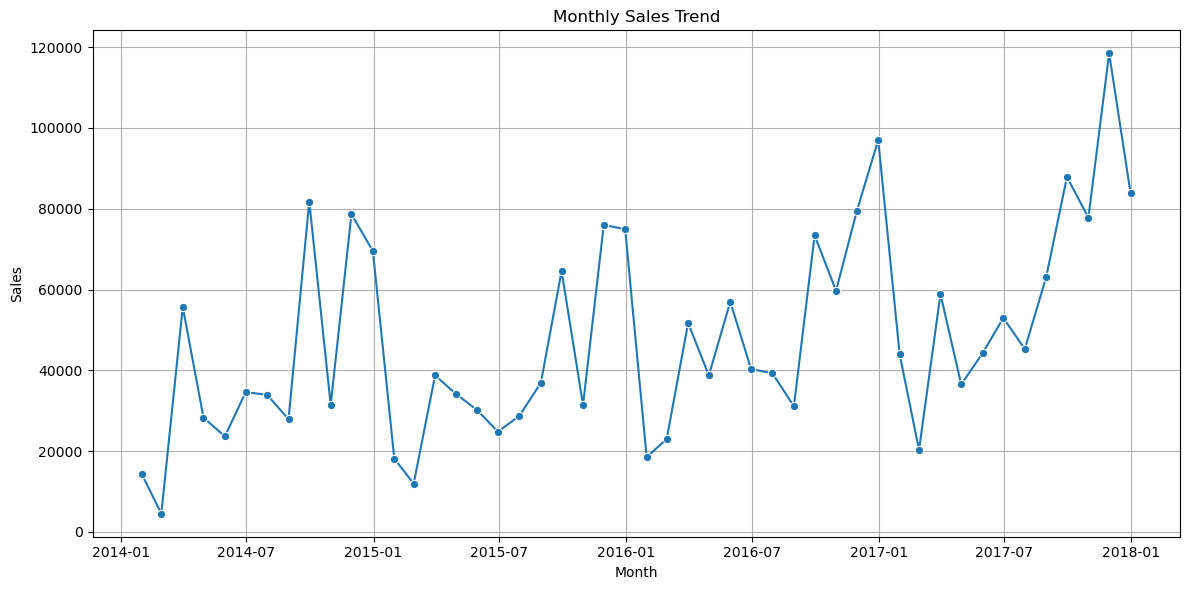

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and calculate sales
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


# Top 10 Products by Total Sales

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\1926872541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


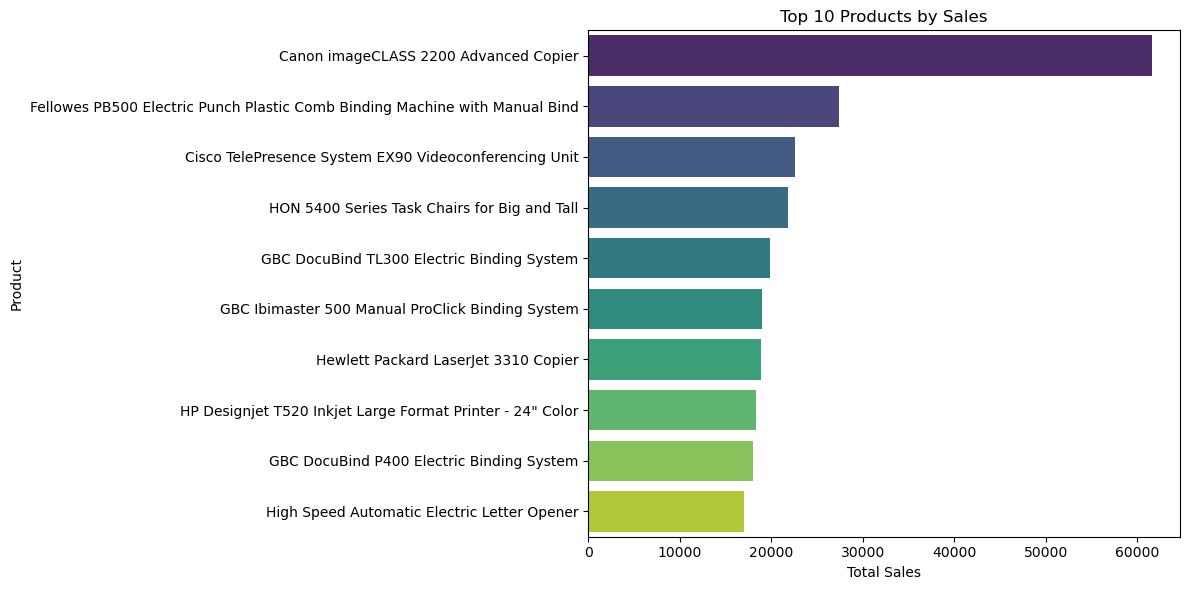

In [34]:
# Group by Product Name and sum Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


# sales by Region

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\3857460755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')


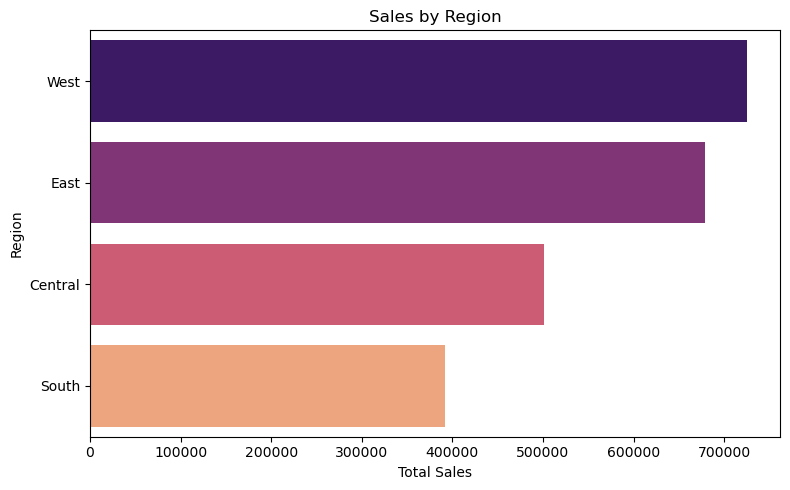

In [36]:
# Group sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='magma')
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# Profit by Category

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\4290471969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.values, y=category_profit.index, palette='coolwarm')


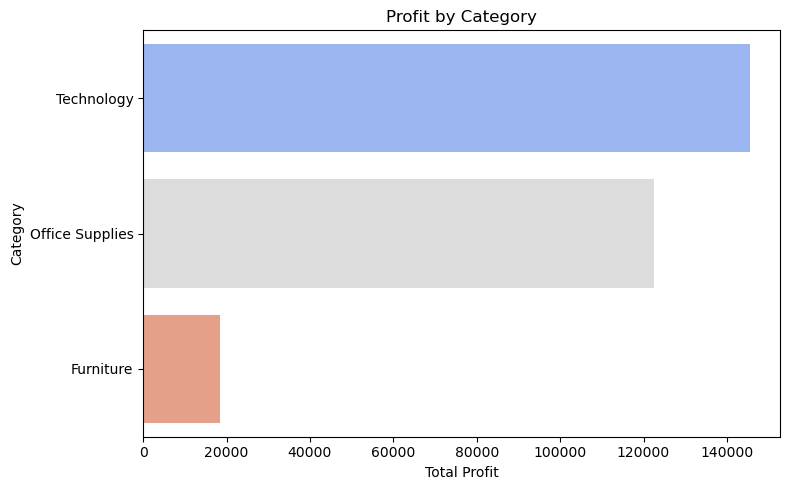

In [44]:
# Group profit by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_profit.values, y=category_profit.index, palette='coolwarm')
plt.title("Profit by Category")
plt.xlabel("Total Profit")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


# Profit by Segment

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\3317495069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profit.values, y=segment_profit.index, palette='Blues_r')


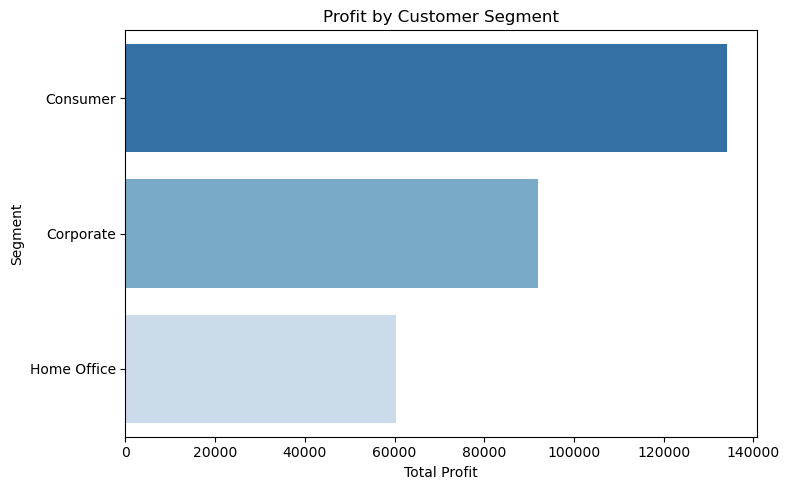

In [46]:
# Profit by customer segment
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_profit.values, y=segment_profit.index, palette='Blues_r')
plt.title("Profit by Customer Segment")
plt.xlabel("Total Profit")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()


# Heatmap – Category vs Sub-Category Sales

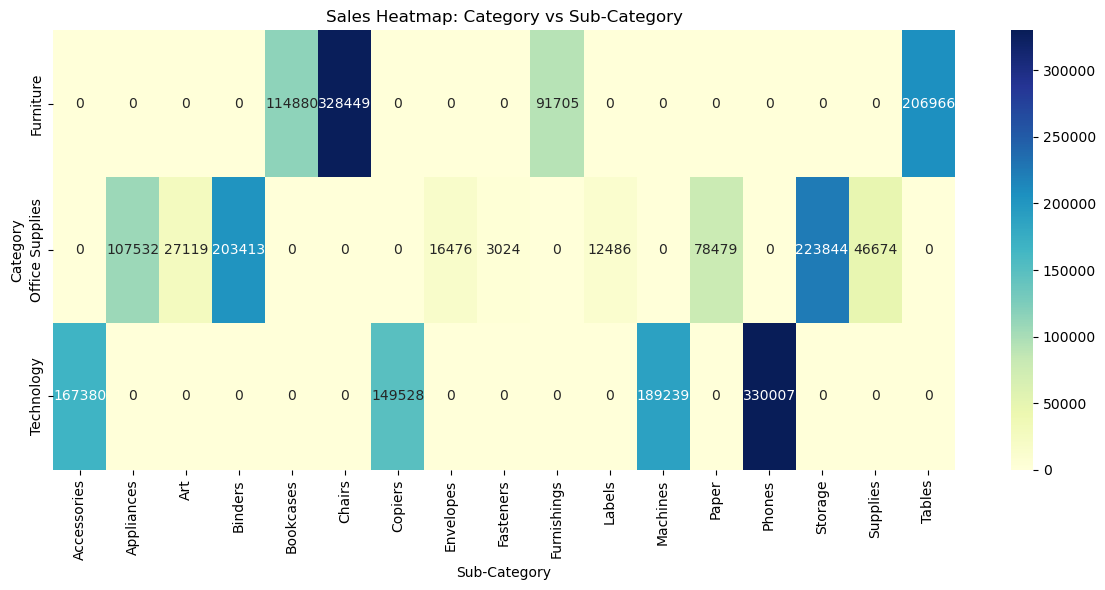

In [48]:
# Pivot table for heatmap
pivot_table = pd.pivot_table(df, values='Sales',
                              index='Category', columns='Sub-Category',
                              aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Sales Heatmap: Category vs Sub-Category")
plt.tight_layout()
plt.show()


In [ ]:
# Ship Mode Impact on Sales

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2356\3119945659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_sales.values, y=ship_mode_sales.index, palette='Set2')


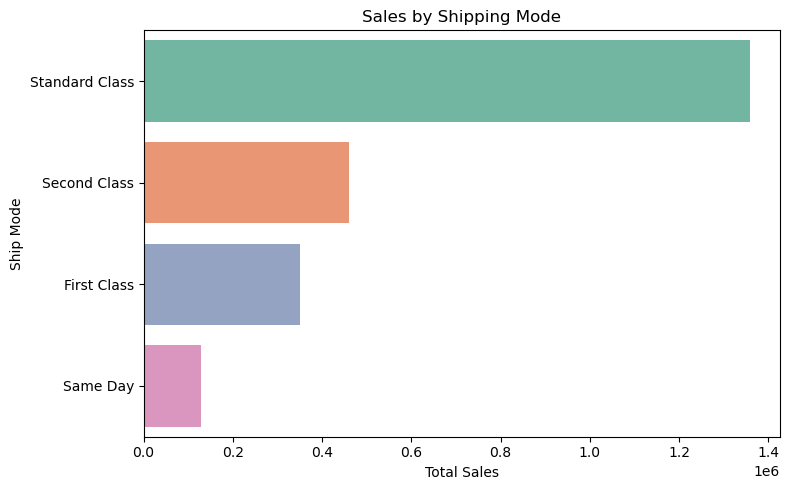

In [50]:
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=ship_mode_sales.values, y=ship_mode_sales.index, palette='Set2')
plt.title("Sales by Shipping Mode")
plt.xlabel("Total Sales")
plt.ylabel("Ship Mode")
plt.tight_layout()
plt.show()
